In [51]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

heavy_user_data = pd.read_csv("data/heavy_user.csv")
#print the whole dataset to have initial overview
heavy_user_data

,Unnamed: 0,SOC,SOH,Charging_Cycles,Battery_Temp,Motor_RPM,Motor_Torque,Motor_Temp,Brake_Pad_Wear,Charging_Voltage,Tire_Pressure,DTC
0,2020-01-01 00:00:00,20.000000,99.999757,0,31.822998,0.0,0.0,64.937230,100.000000,400,34.987175,0
1,2020-01-01 01:00:00,20.000000,99.999495,0,31.596741,0.0,0.0,71.637683,100.000000,400,34.976006,0
2,2020-01-01 02:00:00,20.000000,99.999244,0,31.694791,0.0,0.0,76.626964,100.000000,400,34.961510,0
3,2020-01-01 03:00:00,20.000000,99.998996,0,29.370583,0.0,0.0,73.446945,100.000000,400,34.949125,0
4,2020-01-01 04:00:00,20.000000,99.998749,0,30.808790,0.0,0.0,70.240659,100.000000,400,34.935932,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43795,2024-12-29 19:00:00,41.896804,90.120302,29,30.644411,0.0,0.0,73.274256,57.599885,400,29.247296,0
43796,2024-12-29 20:00:00,41.896804,90.120050,29,31.478640,0.0,0.0,71.116980,57.599885,400,29.235478,0
43797,2024-12-29 21:00:00,41.896804,90.119788,29,28.318739,0.0,0.0,71.968694,57.599885,400,29.220806,0
43798,2024-12-29 22:00:00,41.896804,90.119528,29,30.484194,0.0,0.0,70.822133,57.599885,400,29.209373,0


In [52]:
# Give the timestamp column a fitting name and convert them to datetime objects
heavy_user_data.rename(columns={"Unnamed: 0": "TimeStamp"}, inplace=True)
heavy_user_data["TimeStamp"] = pd.to_datetime(heavy_user_data["TimeStamp"])

In [53]:
# checking the datatypes of all the features, we see that there are 2 non-numerical features which are the timestamps and the diagnostic trouble codes. The datetimestamps
# will be converted from objec type to datetime objects. 
heavy_user_data.dtypes

TimeStamp           datetime64[ns]
SOC                        float64
SOH                        float64
Charging_Cycles              int64
Battery_Temp               float64
Motor_RPM                  float64
Motor_Torque               float64
Motor_Temp                 float64
Brake_Pad_Wear             float64
Charging_Voltage             int64
Tire_Pressure              float64
DTC                         object
dtype: object

In [54]:
# Get some general statistics about the numerical features in our dataset.
heavy_user_data.describe()

,TimeStamp,SOC,SOH,Charging_Cycles,Battery_Temp,Motor_RPM,Motor_Torque,Motor_Temp,Brake_Pad_Wear,Charging_Voltage,Tire_Pressure
count,43800,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.0,43800.000000
mean,2022-07-01 11:30:00,60.817630,94.370603,80.127329,35.229109,936.372513,187.274503,73.179096,67.216827,400.0,28.519119
min,2020-01-01 00:00:00,20.000000,84.549563,0.000000,21.687029,0.000000,0.000000,57.677255,29.985945,400.0,24.985802
25%,2021-04-01 05:45:00,40.805185,91.632924,30.000000,29.521866,0.000000,0.000000,68.498325,50.819838,400.0,26.740318
50%,2022-07-01 11:30:00,60.718705,93.641809,74.000000,31.574952,0.000000,0.000000,70.827440,68.093027,400.0,28.512844
75%,2023-09-30 17:15:00,80.990738,97.369855,124.000000,38.855954,1532.385970,306.477194,73.897828,84.402397,400.0,30.280491
max,2024-12-29 23:00:00,100.000000,99.999757,192.000000,65.834883,4746.911143,949.382229,110.348979,100.000000,400.0,34.987175
std,NaN,23.251624,3.225082,55.288573,8.593342,1285.998029,257.199606,8.045529,19.881618,0.0,2.056479


In [55]:
# check the amount of occurences per Diagnostic Trouble Code and observed the imbalance and we don't know the difference between the codes
heavy_user_data['DTC'].value_counts()

DTC
0            42594
P0MR          1006
P0MT           114
P0T             75
P0T,P0MR         3
P0B              3
P0P              3
P0MR,P0MT        1
P0S              1
Name: count, dtype: int64

In [56]:
# therefore we group all the DTC's in one trouble group and therefore reduce the initial multiclass classification problem to a binary classification problem
heavy_user_data["DTC"] = heavy_user_data["DTC"].apply(lambda x: "1" if x != "0" else "0")
heavy_user_data['DTC'].value_counts()

DTC
0    42594
1     1206
Name: count, dtype: int64

In [57]:
# check for missing values of which there are none
print(heavy_user_data.isna().sum())

TimeStamp           0
SOC                 0
SOH                 0
Charging_Cycles     0
Battery_Temp        0
Motor_RPM           0
Motor_Torque        0
Motor_Temp          0
Brake_Pad_Wear      0
Charging_Voltage    0
Tire_Pressure       0
DTC                 0
dtype: int64


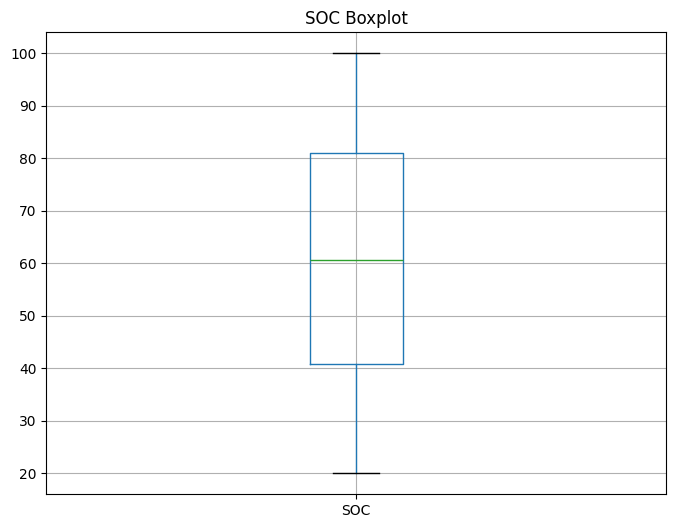

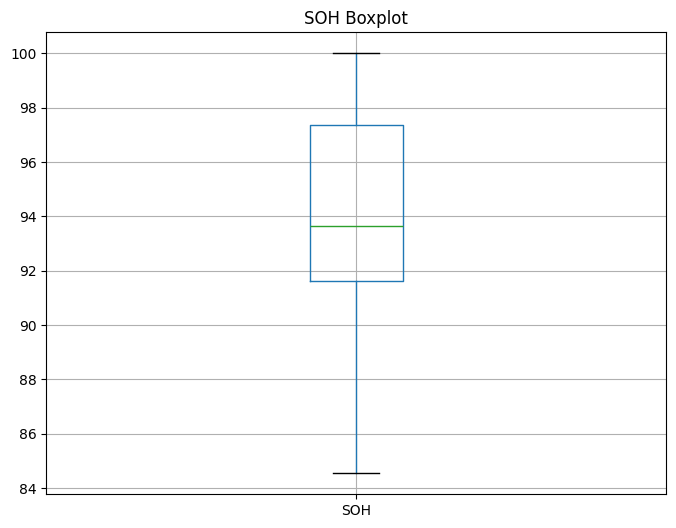

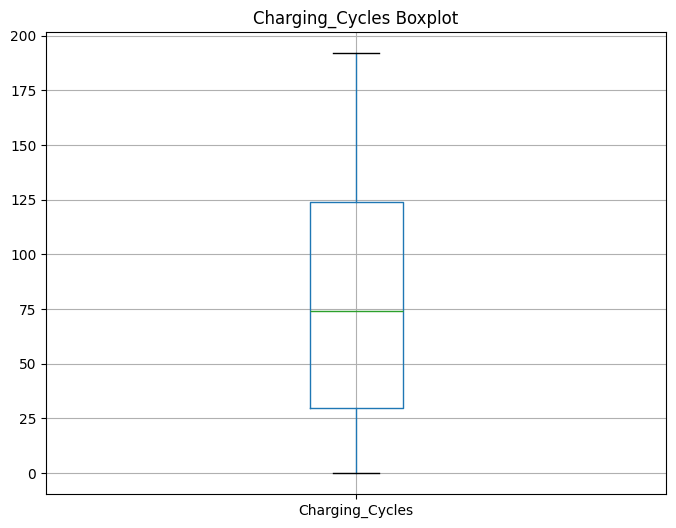

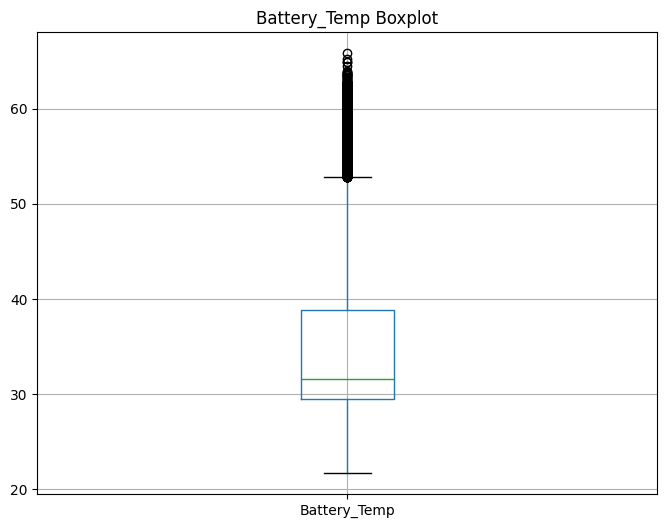

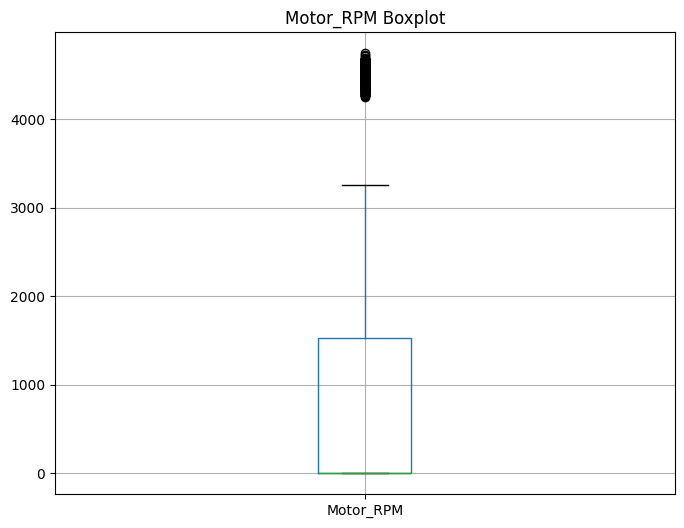

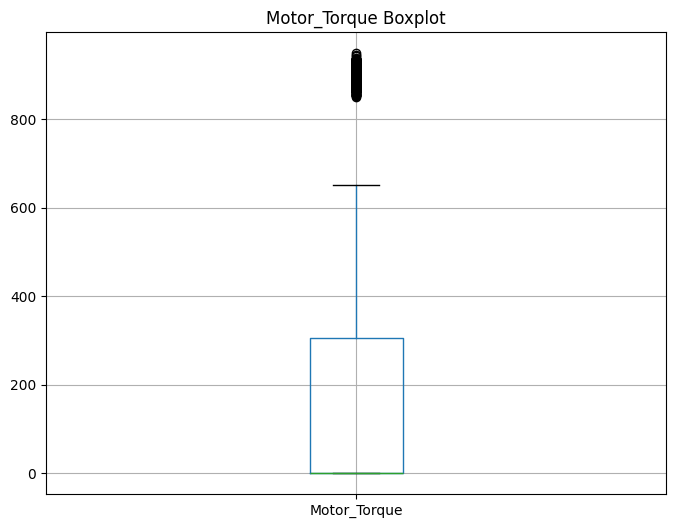

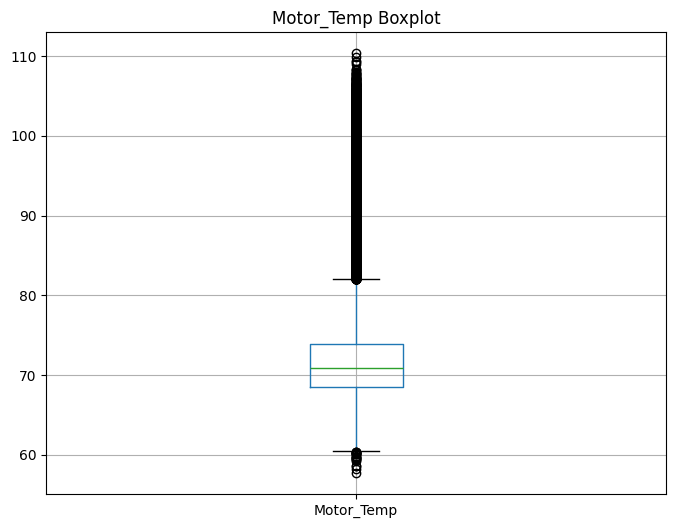

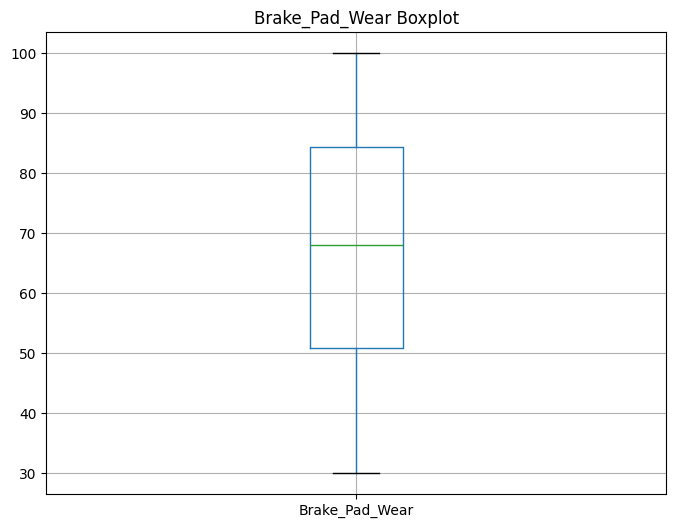

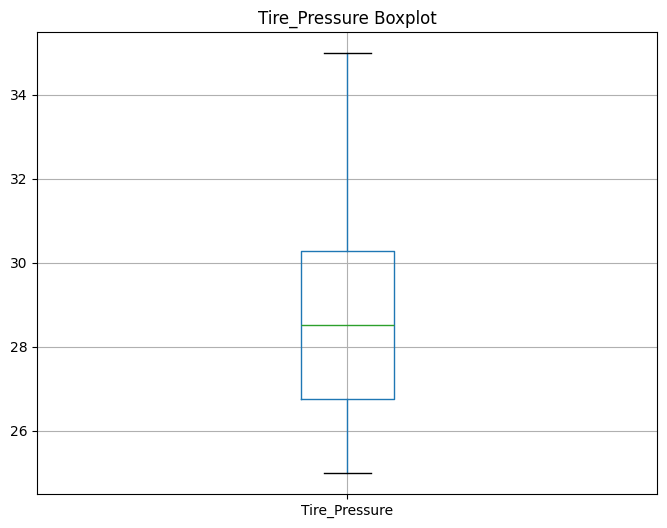

In [58]:
# we check the boxplots of each numerical feature to check the distribution and possible outliers. The outliers we found are in Motor_RPM, Motor_Torque, Motor_Temp, and 
# Battery_Temp. We don't know the exact units they were measured in but we can make an educated guess and considering the most used units of measurement we are pretty 
# confident. With this knowledge we see that the outliers are actually very realistic values and are therefore not flagged as bad measurements caused by e.g. a faulty sensor. 
# These values should be included in the training of the models to also observe these situations and learn those patterns. For Motor_RPM and Motor_Torque, there are also 0
# values when the vehicle is stopped at e.g. a traffic light. This skews the data and therefore flags a lot of values as outliers while they are realistic values.
numeric = list(heavy_user_data.select_dtypes(include='number').columns)
numeric.remove('Charging_Voltage')
for col in numeric:
    plt.figure(figsize=(8, 6))
    plt.title(f'{col} Boxplot')
    heavy_user_data.boxplot(column=col)
    plt.show()

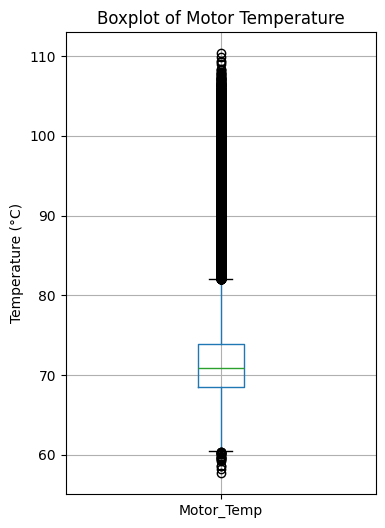

In [59]:
#nicer plot for the presentation
plt.figure(figsize=(4, 6))
plt.title(f'Boxplot of Motor Temperature')
plt.ylabel("Temperature (°C)")
heavy_user_data.boxplot(column="Motor_Temp")
plt.show()

<Axes: >

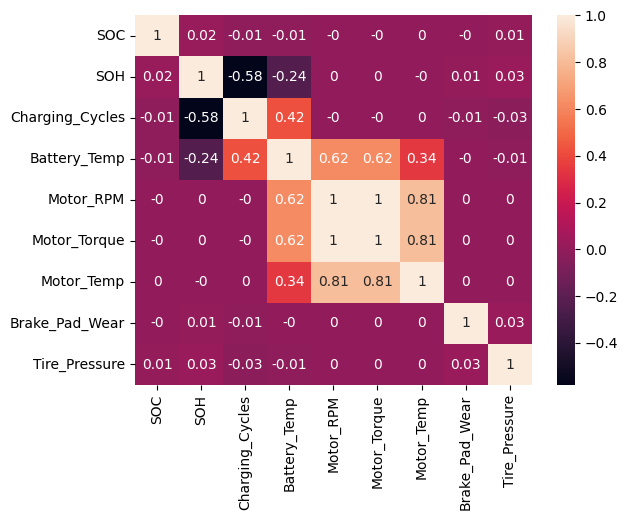

In [60]:
correlation = heavy_user_data[numeric].corr()
correlation = correlation.round(2)
sb.heatmap(correlation, annot=True)

In [61]:
historical_dataset = pd.DataFrame(columns=['TimeStamp', 'cc'])
row = ['19-02-1998', 5]
for index in range(5):
    historical_dataset.loc[len(historical_dataset)] = row
historical_dataset

,TimeStamp,cc
0,19-02-1998,5
1,19-02-1998,5
2,19-02-1998,5
3,19-02-1998,5
4,19-02-1998,5
